**마켓 데이터 크롤링**

# KRX 전종목 시가총액 순위


**2022 [thinkbee.kr]()**

# 시가총액 다운로드

한국거래소 정보데이터시스템(http://data.krx.co.kr) "전종목 시세"에서 종목 전체를 얻을 수 있습니다.

* http://data.krx.co.kr
    * 기본통계 > 주식 > 종목시세 > 전종목시세
    * http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0201020101

<img width="70%" src="http://i.imgur.com/HN7uuAx.png" >


조회와 파일로 다운받는데 csv, xlsx 로 다운받으면 

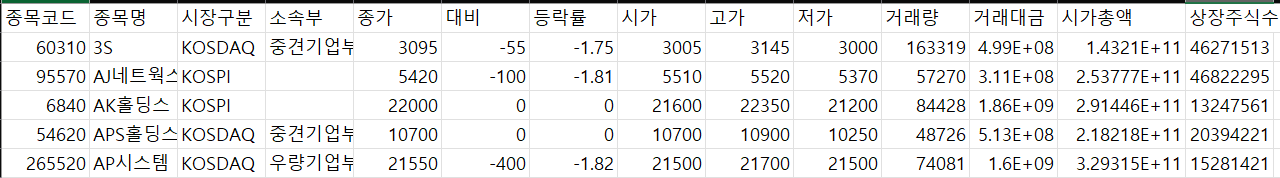

## (1) **전종목 시세** 다운로드 분석

시가총액 데이터 파일 (data.xls)를 다운로드로드에 대한 과정을 분석하기 위해서 브라우저개발자 모드 -> Network 탭에서 요청 URL과 파라미터를분석한다. 

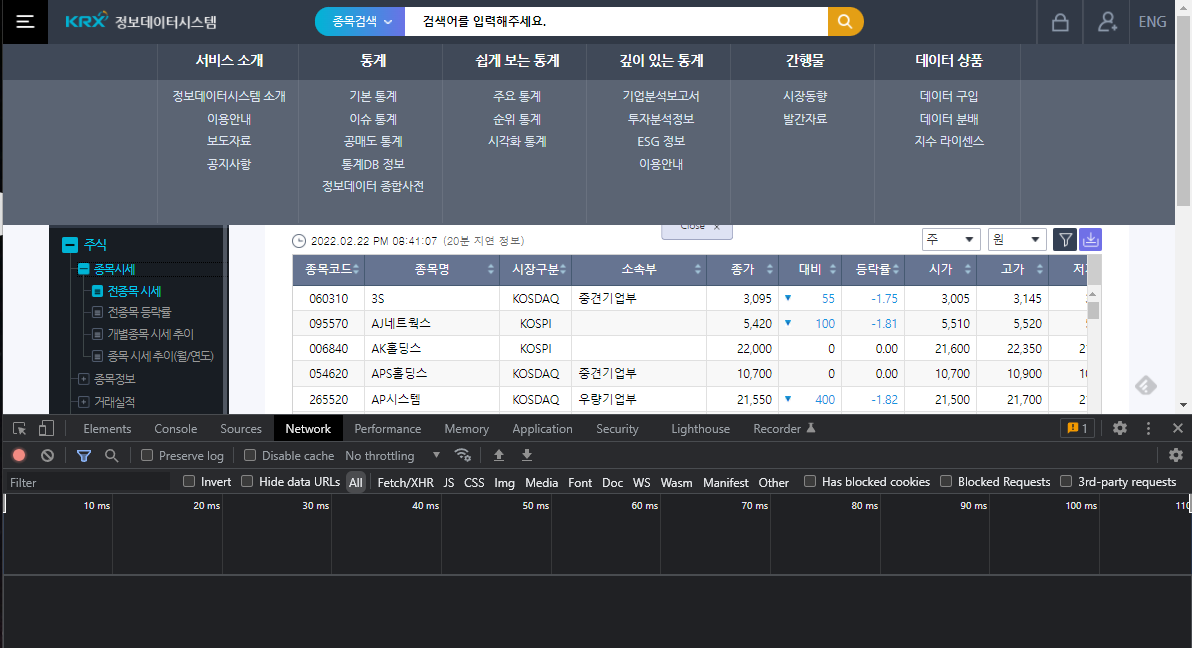


**전종목 시세** 화면이 호출되거나 , **`조회`** 버튼을 눌었을 때, `POST Request URL: http://data.krx.co.kr/comm/bldAttendant/getJsonData.cmd` 를 통해 데이터를 받는다.


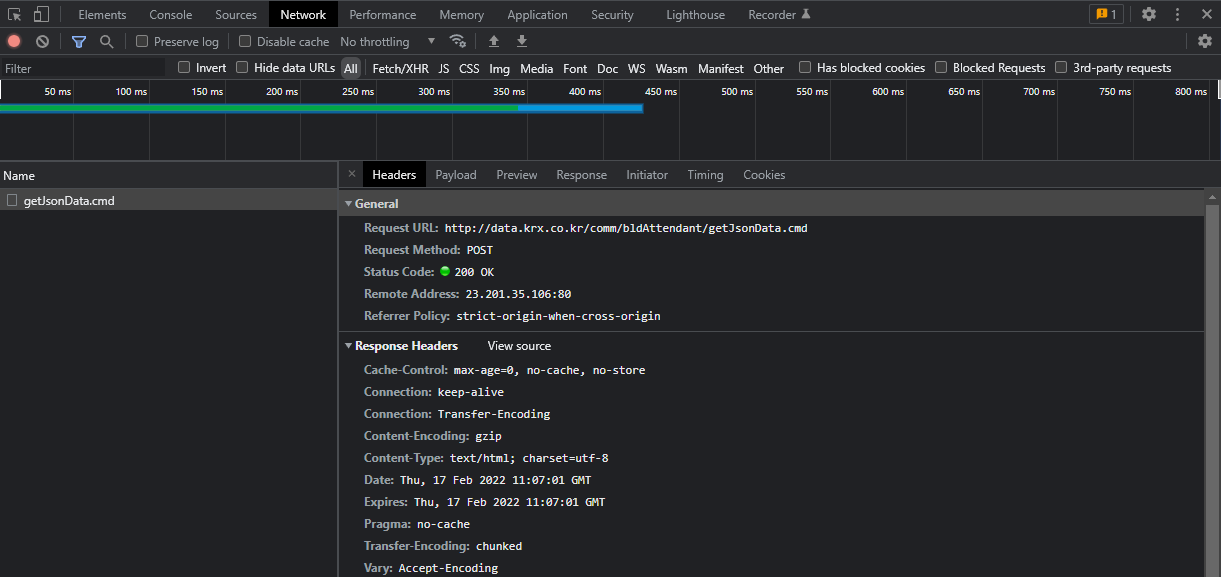

파일을 다운로드 받으려면 다운로드 링크에서 Excel (혹은 CSV) 로 다운로드 한다. 

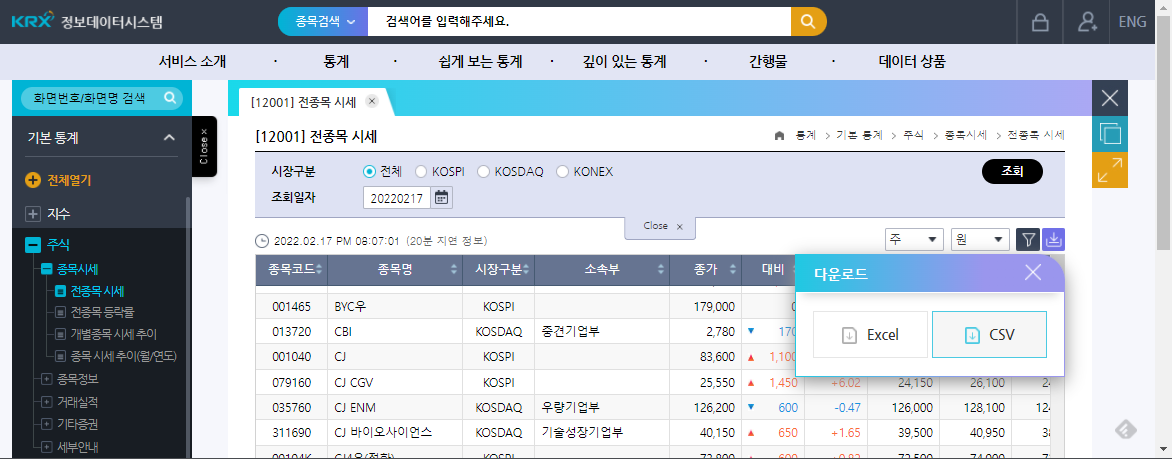


파일 다운로드를 클릭하면 실제 다운로드를 요청하는 URL 과 요청 파라미터를 얻을 수 있다.


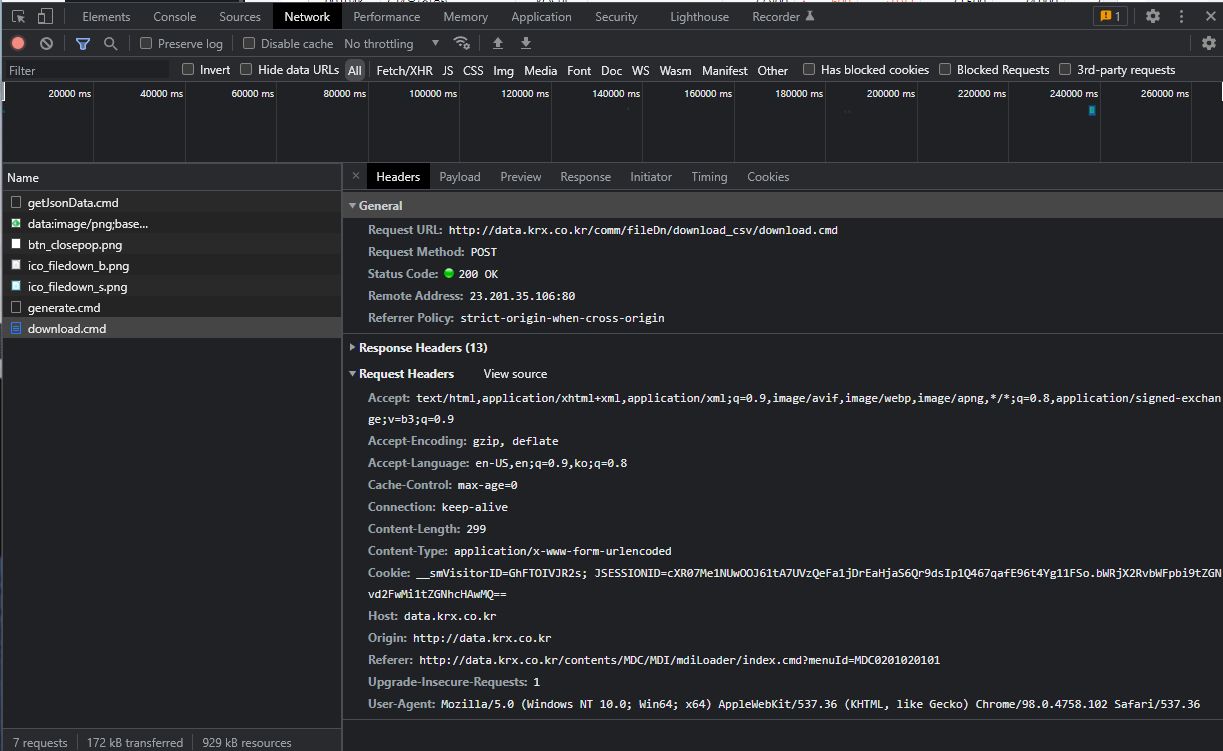

엑셀/CSV 다운로드를 클릭했을 때 나오는 ***generate.cmd*** 와 ***download.cmd*** 에서 얻은 정보만 입력해주면 크롤링이 가능하다.

## (2) **전종목 시세** 다운로드 구현

### `getJsonData.cmd` 호출

getJsonData.cmd 를 요청하면 json으로 OutBlock_1 객체에 데이터가 담겨있다. 이것은 화면에 표시되는 데이터이다.

In [1]:
import requests

url = 'http://data.krx.co.kr/comm/bldAttendant/getJsonData.cmd'
data = {
    'bld': 'dbms/MDC/STAT/standard/MDCSTAT01501',
    'mktId': 'ALL',
    'trdDd': '20210104',
    'share': '1',
    'money': '1',
    'csvxls_isNo': 'false',
}

r = requests.post(url, data)
r.text[:1000]

'{"OutBlock_1":[{"ISU_SRT_CD":"060310","ISU_CD":"KR7060310000","ISU_ABBRV":"3S","MKT_NM":"KOSDAQ","SECT_TP_NM":"중견기업부","TDD_CLSPRC":"2,260","FLUC_TP_CD":"1","CMPPREVDD_PRC":"95","FLUC_RT":"4.39","TDD_OPNPRC":"2,185","TDD_HGPRC":"2,320","TDD_LWPRC":"2,135","ACC_TRDVOL":"588,133","ACC_TRDVAL":"1,306,838,265","MKTCAP":"101,253,674,860","LIST_SHRS":"44,802,511","MKT_ID":"KSQ"},{"ISU_SRT_CD":"095570","ISU_CD":"KR7095570008","ISU_ABBRV":"AJ네트웍스","MKT_NM":"KOSPI","SECT_TP_NM":"","TDD_CLSPRC":"4,580","FLUC_TP_CD":"2","CMPPREVDD_PRC":"-35","FLUC_RT":"-0.76","TDD_OPNPRC":"4,615","TDD_HGPRC":"4,650","TDD_LWPRC":"4,530","ACC_TRDVOL":"344,232","ACC_TRDVAL":"1,575,110,755","MKTCAP":"214,446,111,100","LIST_SHRS":"46,822,295","MKT_ID":"STK"},{"ISU_SRT_CD":"006840","ISU_CD":"KR7006840003","ISU_ABBRV":"AK홀딩스","MKT_NM":"KOSPI","SECT_TP_NM":"","TDD_CLSPRC":"25,250","FLUC_TP_CD":"1","CMPPREVDD_PRC":"100","FLUC_RT":"0.40","TDD_OPNPRC":"25,900","TDD_HGPRC":"25,900","TDD_LWPRC":"25,200","ACC_TRDVOL":"92,861",

In [6]:
r.content

b'{"OutBlock_1":[{"ISU_SRT_CD":"060310","ISU_CD":"KR7060310000","ISU_ABBRV":"3S","MKT_NM":"KOSDAQ","SECT_TP_NM":"\xec\xa4\x91\xea\xb2\xac\xea\xb8\xb0\xec\x97\x85\xeb\xb6\x80","TDD_CLSPRC":"2,260","FLUC_TP_CD":"1","CMPPREVDD_PRC":"95","FLUC_RT":"4.39","TDD_OPNPRC":"2,185","TDD_HGPRC":"2,320","TDD_LWPRC":"2,135","ACC_TRDVOL":"588,133","ACC_TRDVAL":"1,306,838,265","MKTCAP":"101,253,674,860","LIST_SHRS":"44,802,511","MKT_ID":"KSQ"},{"ISU_SRT_CD":"095570","ISU_CD":"KR7095570008","ISU_ABBRV":"AJ\xeb\x84\xa4\xed\x8a\xb8\xec\x9b\x8d\xec\x8a\xa4","MKT_NM":"KOSPI","SECT_TP_NM":"","TDD_CLSPRC":"4,580","FLUC_TP_CD":"2","CMPPREVDD_PRC":"-35","FLUC_RT":"-0.76","TDD_OPNPRC":"4,615","TDD_HGPRC":"4,650","TDD_LWPRC":"4,530","ACC_TRDVOL":"344,232","ACC_TRDVAL":"1,575,110,755","MKTCAP":"214,446,111,100","LIST_SHRS":"46,822,295","MKT_ID":"STK"},{"ISU_SRT_CD":"006840","ISU_CD":"KR7006840003","ISU_ABBRV":"AK\xed\x99\x80\xeb\x94\xa9\xec\x8a\xa4","MKT_NM":"KOSPI","SECT_TP_NM":"","TDD_CLSPRC":"25,250","FLUC_TP_

### `OutBlock_1` 분석

```python
{
   "OutBlock_1":[
      {
         "ISU_SRT_CD":"060310",
         "ISU_ABBRV":"3S",
         "MKT_NM":"KOSDAQ",
         "SECT_TP_NM":"중견기업부",
         "TDD_CLSPRC":"2,260",
         "FLUC_TP_CD":"1",
         "CMPPREVDD_PRC":"95",
         "FLUC_RT":"4.39",
         "TDD_OPNPRC":"2,185",
         "TDD_HGPRC":"2,320",
         "TDD_LWPRC":"2,135",
         "ACC_TRDVOL":"588,133",
         "ACC_TRDVAL":"1,306,838,265",
         "MKTCAP":"101,253,674,860",
         "LIST_SHRS":"44,802,511",
         "MKT_ID":"KSQ"
      },
      {
         "ISU_SRT_CD":"095570",
         "ISU_ABBRV":"AJ네트웍스",
         "MKT_NM":"KOSPI",
         "SECT_TP_NM":"",
         "TDD_CLSPRC":"4,580",
         "FLUC_TP_CD":"2",
         "CMPPREVDD_PRC":"-35",
         "FLUC_RT":"-0.76",
         "TDD_OPNPRC":"4,615",
         "TDD_HGPRC":"4,650",
         "TDD_LWPRC":"4,530",
         "ACC_TRDVOL":"344,232",
         "ACC_TRDVAL":"1,575,110,755",
         "MKTCAP":"214,446,111,100",
         "LIST_SHRS":"46,822,295",
         "MKT_ID":"STK"
      },
      // ... 생략 ...
}
```

### 파일로 저장

In [2]:
with open('krx_download.xls', 'w') as f:
    f.write(r.content)

TypeError: write() argument must be str, not bytes

### json 으로 저장

In [ ]:
import json

j = json.loads(r.text)
j['OutBlock_1'][:2] # 처음 2건

[{'ACC_TRDVAL': '1,306,838,265',
  'ACC_TRDVOL': '588,133',
  'CMPPREVDD_PRC': '95',
  'FLUC_RT': '4.39',
  'FLUC_TP_CD': '1',
  'ISU_ABBRV': '3S',
  'ISU_SRT_CD': '060310',
  'LIST_SHRS': '44,802,511',
  'MKTCAP': '101,253,674,860',
  'MKT_ID': 'KSQ',
  'MKT_NM': 'KOSDAQ',
  'SECT_TP_NM': '중견기업부',
  'TDD_CLSPRC': '2,260',
  'TDD_HGPRC': '2,320',
  'TDD_LWPRC': '2,135',
  'TDD_OPNPRC': '2,185'},
 {'ACC_TRDVAL': '1,575,110,755',
  'ACC_TRDVOL': '344,232',
  'CMPPREVDD_PRC': '-35',
  'FLUC_RT': '-0.76',
  'FLUC_TP_CD': '2',
  'ISU_ABBRV': 'AJ네트웍스',
  'ISU_SRT_CD': '095570',
  'LIST_SHRS': '46,822,295',
  'MKTCAP': '214,446,111,100',
  'MKT_ID': 'STK',
  'MKT_NM': 'KOSPI',
  'SECT_TP_NM': '',
  'TDD_CLSPRC': '4,580',
  'TDD_HGPRC': '4,650',
  'TDD_LWPRC': '4,530',
  'TDD_OPNPRC': '4,615'}]

In [ ]:
import pandas as pd

df = pd.json_normalize(j['OutBlock_1'])
df

,ISU_SRT_CD,ISU_ABBRV,MKT_NM,SECT_TP_NM,TDD_CLSPRC,FLUC_TP_CD,CMPPREVDD_PRC,FLUC_RT,TDD_OPNPRC,TDD_HGPRC,TDD_LWPRC,ACC_TRDVOL,ACC_TRDVAL,MKTCAP,LIST_SHRS,MKT_ID
0,060310,3S,KOSDAQ,중견기업부,"2,260",1,95,4.39,"2,185","2,320","2,135","588,133","1,306,838,265","101,253,674,860","44,802,511",KSQ
1,095570,AJ네트웍스,KOSPI,,"4,580",2,-35,-0.76,"4,615","4,650","4,530","344,232","1,575,110,755","214,446,111,100","46,822,295",STK
2,006840,AK홀딩스,KOSPI,,"25,250",1,100,0.40,"25,900","25,900","25,200","92,861","2,353,486,200","334,500,915,250","13,247,561",STK
3,054620,APS홀딩스,KOSDAQ,중견기업부,"8,000",2,-210,-2.56,"8,220","8,270","7,960","300,316","2,409,361,480","163,153,768,000","20,394,221",KSQ
4,265520,AP시스템,KOSDAQ,우량기업부,"25,500",1,650,2.62,"25,100","25,600","24,800","415,285","10,519,827,500","369,245,788,500","14,480,227",KSQ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2526,000547,흥국화재2우B,KOSPI,,"19,550",1,50,0.26,"19,500","20,000","19,500","1,072","20,983,250","3,002,880,000","153,600",STK
2527,000545,흥국화재우,KOSPI,,"7,830",1,380,5.10,"7,430","8,000","7,430","27,245","212,898,920","6,013,440,000","768,000",STK
2528,003280,흥아해운,KOSPI,,258,0,0,0.00,0,0,0,0,0,"30,117,000,222","116,732,559",STK
2529,037440,희림,KOSDAQ,중견기업부,"3,940",1,35,0.90,"3,905","3,940","3,875","41,107","160,050,710","54,854,551,500","13,922,475",KSQ


컬럼들의 타입이 모두 object(str 문자열) 입니다

In [ ]:
df.dtypes

ISU_SRT_CD       object
ISU_ABBRV        object
MKT_NM           object
SECT_TP_NM       object
TDD_CLSPRC       object
FLUC_TP_CD       object
CMPPREVDD_PRC    object
FLUC_RT          object
TDD_OPNPRC       object
TDD_HGPRC        object
TDD_LWPRC        object
ACC_TRDVOL       object
ACC_TRDVAL       object
MKTCAP           object
LIST_SHRS        object
MKT_ID           object
dtype: object

### 컬럼 이름 변경

다음 컬럼들은 ','를 없애고 수치값으로 바꾸어 주어야 합니다.

CMPPREVDD_PRC, FLUC_RT, TDD_OPNPRC, TDD_HGPRC, TDD_LWPRC, ACC_TRDVOL, ACC_TRDVAL, MKTCAP, LIST_SHRS


In [ ]:
# 전체에서 ','를 제거
df = df.replace(',', '', regex=True)

# 수치값으로 변환
numeric_cols = ['CMPPREVDD_PRC', 'FLUC_RT', 'TDD_OPNPRC', 'TDD_HGPRC', 'TDD_LWPRC', 
                'ACC_TRDVOL', 'ACC_TRDVAL', 'MKTCAP', 'LIST_SHRS'] 
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# 시가총액순으로 소트
df = df.sort_values('MKTCAP', ascending=False) 
df

,ISU_SRT_CD,ISU_ABBRV,MKT_NM,SECT_TP_NM,TDD_CLSPRC,FLUC_TP_CD,CMPPREVDD_PRC,FLUC_RT,TDD_OPNPRC,TDD_HGPRC,TDD_LWPRC,ACC_TRDVOL,ACC_TRDVAL,MKTCAP,LIST_SHRS,MKT_ID
933,005930,삼성전자,KOSPI,,83000,1,2000,2.47,81000,84400,80200,38655276,3185356823460,495491951650000,5969782550,STK
209,000660,SK하이닉스,KOSPI,,126000,1,7500,6.33,124500,128000,120500,7995016,994276505704,91728297990000,728002365,STK
129,051910,LG화학,KOSPI,,889000,1,65000,7.89,849000,900000,835000,858451,747929748128,62756592927000,70592343,STK
934,005935,삼성전자우,KOSPI,,74400,1,800,1.09,73700,75300,73600,5455139,405685236800,61222770480000,822886700,STK
926,207940,삼성바이오로직스,KOSPI,,829000,1,3000,0.36,819000,838000,804000,182864,149889473000,54850785000000,66165000,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,242350,피엔아이컴퍼니,KONEX,일반기업부,436,1,22,5.31,414,459,391,1648,684263,2076022720,4761520,KNX
1309,267810,앙츠,KONEX,일반기업부,1310,2,-25,-1.87,0,0,0,0,0,2026570000,1547000,KNX
1362,224020,에스케이씨에스,KONEX,일반기업부,750,1,70,10.29,750,750,750,1001,750750,2025000000,2700000,KNX
1515,179720,옐로페이,KONEX,일반기업부,2600,1,170,7.00,2250,2600,2200,27,63030,1922700000,739500,KNX


In [ ]:
df.dtypes

ISU_SRT_CD        object
ISU_ABBRV         object
MKT_NM            object
SECT_TP_NM        object
TDD_CLSPRC        object
FLUC_TP_CD        object
CMPPREVDD_PRC      int64
FLUC_RT          float64
TDD_OPNPRC         int64
TDD_HGPRC          int64
TDD_LWPRC          int64
ACC_TRDVOL         int64
ACC_TRDVAL         int64
MKTCAP             int64
LIST_SHRS          int64
MKT_ID            object
dtype: object

## (3) **전종목 시세** 현재화면 함수로 만들기

In [ ]:
import requests
import numpy as np
import pandas as pd
import json

def krx_marcap(date):
    '''
    날짜 date를 받아 해당 날짜의 주가시세 파일을 다운로드 한다.
    
    return:
    '''

    

In [ ]:
# 사용예
marcap = krx_marcap('20210104')
marcap

,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
1,005930,삼성전자,KOSPI,,83000,1,2000,2.47,81000,84400,80200,38655276,3185356823460,495491951650000,5969782550,STK
2,000660,SK하이닉스,KOSPI,,126000,1,7500,6.33,124500,128000,120500,7995016,994276505704,91728297990000,728002365,STK
3,051910,LG화학,KOSPI,,889000,1,65000,7.89,849000,900000,835000,858451,747929748128,62756592927000,70592343,STK
4,005935,삼성전자우,KOSPI,,74400,1,800,1.09,73700,75300,73600,5455139,405685236800,61222770480000,822886700,STK
5,207940,삼성바이오로직스,KOSPI,,829000,1,3000,0.36,819000,838000,804000,182864,149889473000,54850785000000,66165000,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2527,242350,피엔아이컴퍼니,KONEX,일반기업부,436,1,22,5.31,414,459,391,1648,684263,2076022720,4761520,KNX
2528,267810,앙츠,KONEX,일반기업부,1310,2,-25,-1.87,0,0,0,0,0,2026570000,1547000,KNX
2529,224020,에스케이씨에스,KONEX,일반기업부,750,1,70,10.29,750,750,750,1001,750750,2025000000,2700000,KNX
2530,179720,옐로페이,KONEX,일반기업부,2600,1,170,7.00,2250,2600,2200,27,63030,1922700000,739500,KNX


# (참고) FinanceDataReader

FinanceDataReader 구현되어 있어 손쉽게 가져다 쓸 수 있습니다.

https://github.com/FinanceData/FinanceDataReader/blob/master/krx/listing.py

# (참고) 데이터 상품
전종목 일자별 시세 데이터 2020년 1년치

<img width="60%" src="https://i.imgur.com/KF3ciha.png" >
